In [160]:
# Import the pandas library as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [161]:
# Read 'Data.csv' into a DataFrame named data
data = pd.read_csv('C:/Users/sabih/OneDrive/Desktop/Data.csv')

In [162]:
# Examine the head of the DataFrame
print(data.head())

# Examine the shape of the DataFrame
print(data.shape)

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ...  DeviceProtection  \
0  No phone service             DSL             No  ...                No   
1                No             DSL            Yes  ...               Yes   
2                No             DSL            Yes  ...                No   
3  No phone service             DSL            Yes  ...               Yes   
4                No     Fiber optic             No  ...                No   

  TechSupport StreamingTV StreamingMovies        Contrac

In [163]:
# Count the number of missing values in each column
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


There are no null values in the data set.

In [164]:
# Print the data types of dataset
print(data.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


##### It looks like the data set can be divided into two categories: Categorical data: gender, payment method etc. Numerical data: tenure, monthly charges etc.

In [165]:
# Set 'stop_datetime' as the index
#data.set_index('customerID', inplace=True)

# Examine the index
#print(data.index)

# Examine the columns
#print(data.columns)


##### Since our whole data reloves around the number of chruners and non churners hence we will convert the churn column type into integer 

In [166]:
data.loc[data.Churn=='No','Churn'] = 0
data.loc[data.Churn=='Yes','Churn'] = 1

gender
Female    0.269209
Male      0.261603
Name: Churn, dtype: float64


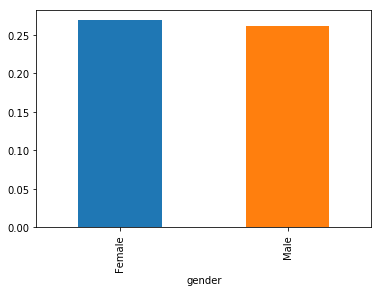

In [167]:
# Express Gender in terms of Churn
By_Gender = data.groupby('gender').Churn.mean()
print(data.groupby('gender').Churn.mean())
%matplotlib inline
By_Gender.plot(kind='bar')

##### Female customers are more likely to churn in comparison to male customers

PaymentMethod
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Electronic check             0.452854
Mailed check                 0.191067
Name: Churn, dtype: float64


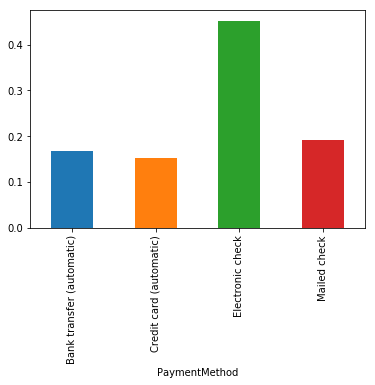

In [168]:
# Express PaymentMethod in terms of Churn
Payment_medium = data.groupby('PaymentMethod').Churn.mean()
print(data.groupby('PaymentMethod').Churn.mean())
%matplotlib inline
Payment_medium.plot(kind='bar')

##### It seems like customer perfer automatic payment to be the best suitable medium for payment

Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn, dtype: float64


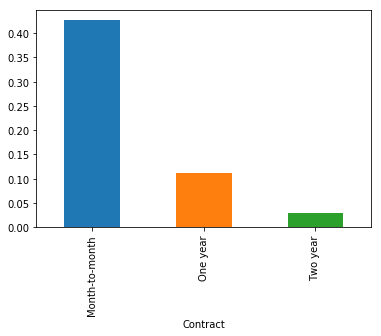

In [169]:
# Express Contracts in terms of Churn
By_Contract = data.groupby('Contract').Churn.mean()
print(data.groupby('Contract').Churn.mean())
%matplotlib inline
By_Contract.plot(kind='bar')

##### month to month contract has higher churn rate.This could indicate that company is unable to retain new customers and customer who have been using the comapnies services over one year are still using the wervices 

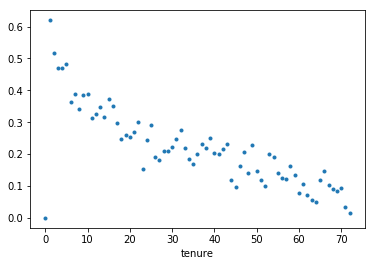

In [170]:
# Express the counts as proportions
By_Tenure = data.groupby('tenure').Churn.mean()

%matplotlib inline
By_Tenure.plot(style='.')

##### Same thing can be seen if we visualize the tenure against the churn rate we see that higher tenure will have lower churn rate 

## Machine Learning models

###### Supervised learning is the machine learning task of learning a function that maps an input to an output based on example input-output pairs. It infers a function from labeled training data consisting of a set of training examples.There are two types of supervised learning classificationa and regression.
##### Since most of the data in the data set is object in terms of data type we will have transform it in order to performe the machine learning operations in the most befitting manner

In [171]:
# Sperating the key identifers in the data set (i.e. Customer ID and Churn column)
ID = ['customerID']
Main = ['Churn']

In [172]:
# Store categorical column names
categorical = data.nunique()[data.nunique() < 5].keys().tolist()
# No.5 is a random number and can be changed as per the data set. Since in case almost all the columns with categorical data has a variation of 5 different entires hence we have taken 5

# Remove target from the list of categorical variables
categorical.remove(Main[0])

# Store numerical column names
numerical = [x for x in data.columns if x not in ID + Main + categorical]


In [ ]:
# One-hot encoding to categorical variables 
Telco = pd.get_dummies(data = data, columns = categorical, drop_first=True)

#Changing the data type for numerical
float('Total.Charges')
print(Telco.dtypes)
# Initialize StandardScaler instance
scaler = StandardScaler()

# Fit and transform the scaler on numerical columns
scaled_numerical = scaler.fit_transform(Telco[numerical])

